In [147]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import scipy.io
import matplotlib.pylab as plt
%matplotlib inline

### rep1rep2

In [53]:
true_label_df = pd.read_csv('../data/test_rep1_rep2_valueLabel.bed', sep='\t', header=None)
true_label_df

,0,1,2,3,4
0,chr8,2263,2762,+,0
1,chr8,5765,6264,+,0
2,chr8,7521,8020,+,0
3,chr8,10779,11278,+,0
4,chr8,25502,26001,+,0
...,...,...,...,...,...
91334,chr9,138377328,138377827,+,0
91335,chr9,138381634,138382133,+,0
91336,chr9,138388795,138389294,+,0
91337,chr9,138391106,138391605,+,0


In [54]:
test_df = pd.read_csv('./transfer_trained_rep1rep2/test_rep1_rep2_valueLabel_predictions.tsv', sep='\t')
test_df

,index,chrom,start,end,strand,contains_unk,0,1,2,3,4,5,6,7,8,9
0,0,chr8,2263,2762,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11
1,1,chr8,5765,6264,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11
2,2,chr8,7521,8020,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11
3,3,chr8,10779,11278,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11
4,4,chr8,25502,26001,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91334,91334,chr9,138377328,138377827,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11
91335,91335,chr9,138381634,138382133,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11
91336,91336,chr9,138388795,138389294,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11
91337,91337,chr9,138391106,138391605,.,True,1.0,0.000113,0.000008,0.000002,4.470000e-08,1.480000e-08,1.120000e-09,5.150000e-11,1.040000e-09,7.110000e-11


In [63]:
test_df['pred'] = test_df[[str(i) for i in range(0, 10)]].idxmax(axis="columns").astype(int)

In [36]:
test_df_lossweight = pd.read_csv('../../starr_sig_A549_499bp_lossweights/test_outputs/transfer_trained_rep1rep2_1to9/test_rep1_rep2_valueLabel_predictions.tsv', sep='\t')
test_df_lossweight

,index,chrom,start,end,strand,contains_unk,0,1,2,3,4,5,6,7,8,9
0,0,chr8,2263,2762,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11
1,1,chr8,5765,6264,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11
2,2,chr8,7521,8020,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11
3,3,chr8,10779,11278,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11
4,4,chr8,25502,26001,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91334,91334,chr9,138377328,138377827,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11
91335,91335,chr9,138381634,138382133,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11
91336,91336,chr9,138388795,138389294,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11
91337,91337,chr9,138391106,138391605,.,True,1.0,0.000231,3.740000e-07,6.430000e-08,4.000000e-09,3.130000e-09,9.730000e-10,4.750000e-11,6.350000e-10,1.900000e-11


In [37]:
test_df_lossweight['pred'] = test_df_lossweight[[str(i) for i in range(0, 10)]].astype(float).idxmax(axis="columns")

In [64]:
test_df['pred'].value_counts()

1    64102
0    25864
2     1341
3       14
9       10
4        8
Name: pred, dtype: int64

In [25]:
true_label_df[4].value_counts()

1    43532
0    36686
2     8233
3     1716
4      549
5      247
9      132
6      128
7       71
8       45
Name: 4, dtype: int64

In [33]:
test_df_lossweight['pred'].value_counts()

1    50210
0    41010
2      111
9        8
Name: pred, dtype: int64

In [55]:
test_df_lossweight['pred'].value_counts()

1    65775
0    24554
2      984
3       14
9       12
Name: pred, dtype: int64

In [26]:
test_df[['chrom', 'start', 'end', 'strand', 'pred']].to_csv('./transfer_trained_rep1rep2/test_rep1_rep2_valueLabel_predictions.bed', sep='\t', header=None, index=None)

In [23]:
true_label_df.loc[true_label_df[4] == 6, :]

,0,1,2,3,4
414,chr8,1188057,1188556,+,6
795,chr8,1938100,1938599,+,6
1991,chr8,5320751,5321250,+,6
1995,chr8,5321649,5322148,+,6
2317,chr8,6180401,6180900,+,6
...,...,...,...,...,...
89138,chr9,132269372,132269871,+,6
89760,chr9,133888647,133889146,+,6
90210,chr9,135152661,135153160,+,6
90757,chr9,136601529,136602028,+,6


In [38]:
test_df_lossweight.loc[true_label_df[4] == 2, :]

,index,chrom,start,end,strand,contains_unk,0,1,2,3,4,5,6,7,8,9,pred
33,33,chr8,214053,214552,.,False,0.704,0.257,0.0188,0.00555,0.001550,0.000875,0.000354,0.000222,0.000161,0.000228,0
37,37,chr8,214951,215450,.,False,0.211,0.679,0.0956,0.01050,0.002970,0.001010,0.000686,0.000333,0.000136,0.000292,1
64,64,chr8,260702,261201,.,False,0.161,0.670,0.1280,0.02160,0.011400,0.003770,0.002300,0.001260,0.000571,0.000745,1
65,65,chr8,260802,261301,.,False,0.145,0.654,0.2010,0.03070,0.013600,0.006060,0.002910,0.002350,0.001050,0.001500,1
68,68,chr8,261600,262099,.,False,0.576,0.371,0.0257,0.00633,0.001180,0.000830,0.000315,0.000150,0.000086,0.000123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91299,91299,chr9,138188975,138189474,.,False,0.741,0.265,0.0231,0.00610,0.001610,0.000988,0.000608,0.000153,0.000150,0.000156,0
91302,91302,chr9,138189773,138190272,.,False,0.402,0.634,0.0161,0.00520,0.001190,0.000979,0.000417,0.000179,0.000089,0.000147,1
91303,91303,chr9,138189873,138190372,.,False,0.213,0.735,0.0460,0.00581,0.001140,0.000809,0.000251,0.000145,0.000057,0.000137,1
91309,91309,chr9,138213755,138214254,.,False,0.562,0.405,0.0199,0.00198,0.000524,0.000252,0.000095,0.000043,0.000021,0.000030,0


In [65]:
for i in range(10):
    print(f"label {i} accuracy = {((test_df['pred'] == i) & (true_label_df[4] == i)).sum()/(true_label_df[4] == i).sum()}")

label 0 accuracy = 0.46009376874011887
label 1 accuracy = 0.8060277497013691
label 2 accuracy = 0.030487064253613506
label 3 accuracy = 0.0017482517482517483
label 4 accuracy = 0.0
label 5 accuracy = 0.0
label 6 accuracy = 0.0
label 7 accuracy = 0.0
label 8 accuracy = 0.0
label 9 accuracy = 0.0


In [42]:
1/np.array([2.527831e-06, 2.111099e-06, 1.119645e-05, 5.451374e-05, 1.592864e-04, 3.543586e-04, 7.002801e-04, 1.160093e-03, 1.945525e-03, 8.123477e-04])

array([395596.06635095, 473686.92799343,  89314.02364142,  18343.9991459 ,
         6277.99987946,   2822.00008692,   1428.00002456,    861.99985691,
          514.0000771 ,   1230.99997698])

In [39]:
89314.02364142 + 18343.9991459

107658.02278732

In [40]:
6277.99987946+2822.00008692+1428.00002456+861.99985691+514.0000771 

11903.99992495

In [43]:
861.99985691/18343.9991459

0.046990836079637645

In [68]:
test_df = pd.read_csv('../../starr_sig_A549_499bp_downsample/test_outputs/transfer_trained_rep1rep2/test_rep1_rep2_valueLabel_predictions.tsv', sep='\t')
test_df

,index,chrom,start,end,strand,contains_unk,0,1,2,3,4,5,6,7,8,9
0,0,chr8,108588,109087,.,False,0.1510,0.1790,0.267,0.1760,0.0960,0.0379,0.02070,0.01240,0.00660,0.01060
1,1,chr8,189148,189647,.,False,0.3380,0.2560,0.224,0.1180,0.0760,0.0367,0.02110,0.01430,0.00822,0.00898
2,2,chr8,190100,190599,.,False,0.5670,0.1450,0.131,0.1050,0.0608,0.0166,0.00838,0.00946,0.00838,0.01170
3,3,chr8,196781,197280,.,False,0.7380,0.0798,0.097,0.0750,0.0300,0.0089,0.00470,0.00578,0.00530,0.00787
4,4,chr8,214153,214652,.,False,0.7250,0.2050,0.128,0.0690,0.0471,0.0181,0.00983,0.00481,0.00348,0.00276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7904,7904,chr9,138189673,138190172,.,False,0.2850,0.2880,0.256,0.1480,0.0530,0.0186,0.01290,0.00602,0.00332,0.00438
7905,7905,chr9,138213755,138214254,.,False,0.3530,0.3140,0.159,0.0567,0.0319,0.0095,0.00434,0.00253,0.00155,0.00244
7906,7906,chr9,138213855,138214354,.,False,0.2630,0.3030,0.251,0.0742,0.0354,0.0170,0.00659,0.00395,0.00232,0.00428
7907,7907,chr9,138214204,138214703,.,False,0.0924,0.2190,0.310,0.1350,0.0693,0.0415,0.01270,0.01160,0.00600,0.01490


In [69]:
test_df['pred'] = test_df[[str(i) for i in range(0, 10)]].idxmax(axis="columns").astype(int)

In [71]:
true_label_df = pd.read_csv('../../starr_sig_A549_499bp_downsample/data/test_rep1_rep2_valueLabel.bed', sep='\t', header=None)
true_label_df

,0,1,2,3,4
0,chr8,108588,109087,+,0
1,chr8,189148,189647,+,0
2,chr8,190100,190599,+,0
3,chr8,196781,197280,+,0
4,chr8,214153,214652,+,5
...,...,...,...,...,...
7904,chr9,138189673,138190172,+,3
7905,chr9,138213755,138214254,+,2
7906,chr9,138213855,138214354,+,3
7907,chr9,138214204,138214703,+,3


In [70]:
test_df['pred'].value_counts()

2    3086
0    2670
1    1589
3     483
9      69
4      11
6       1
Name: pred, dtype: int64

In [64]:
test_df['pred'].value_counts()

1    64102
0    25864
2     1341
3       14
9       10
4        8
Name: pred, dtype: int64

In [73]:
true_label_df[4].value_counts()

3    1716
0    1689
2    1687
1    1645
4     549
5     247
9     132
6     128
7      71
8      45
Name: 4, dtype: int64

In [72]:
for i in range(10):
    print(f"label {i} accuracy = {((test_df['pred'] == i) & (true_label_df[4] == i)).sum()/(true_label_df[4] == i).sum()}")

label 0 accuracy = 0.6447602131438721
label 1 accuracy = 0.25653495440729485
label 2 accuracy = 0.46354475400118555
label 3 accuracy = 0.11596736596736597
label 4 accuracy = 0.0
label 5 accuracy = 0.0
label 6 accuracy = 0.0
label 7 accuracy = 0.0
label 8 accuracy = 0.0
label 9 accuracy = 0.007575757575757576


In [95]:
test_df = pd.read_csv('../../starr_sig_A549_499bp_regression/test_outputs/transfer_trained_rep1rep2/test_rep1_rep2_valueLabel_predictions.tsv', sep='\t')
test_df

,index,chrom,start,end,strand,contains_unk,sig
0,0,chr8,2263,2762,.,True,0.0334
1,1,chr8,5765,6264,.,True,0.0334
2,2,chr8,7521,8020,.,True,0.0334
3,3,chr8,10779,11278,.,True,0.0334
4,4,chr8,25502,26001,.,True,0.0334
...,...,...,...,...,...,...,...
91334,91334,chr9,138377328,138377827,.,True,0.0334
91335,91335,chr9,138381634,138382133,.,True,0.0334
91336,91336,chr9,138388795,138389294,.,True,0.0334
91337,91337,chr9,138391106,138391605,.,True,0.0334


In [96]:
test_df[['chrom', 'start', 'end', 'strand', 'sig']].to_csv('../../starr_sig_A549_499bp_regression/test_outputs/transfer_trained_rep1rep2/test_rep1rep2_valueLabel_predictions_regression.bed', sep='\t', header=None, index=None)

In [150]:
test_df = pd.read_csv('../../starr_sig_A549_499bp_regression_downsample/test_outputs/transfer_trained_rep1rep2/test_rep1_rep2_valueLabel_predictions.tsv', sep='\t')
test_df

,index,chrom,start,end,strand,contains_unk,sig
0,0,chr8,2263,2762,.,True,0.873
1,1,chr8,5765,6264,.,True,0.873
2,2,chr8,7521,8020,.,True,0.873
3,3,chr8,10779,11278,.,True,0.873
4,4,chr8,25502,26001,.,True,0.873
...,...,...,...,...,...,...,...
91334,91334,chr9,138377328,138377827,.,True,0.873
91335,91335,chr9,138381634,138382133,.,True,0.873
91336,91336,chr9,138388795,138389294,.,True,0.873
91337,91337,chr9,138391106,138391605,.,True,0.873


In [151]:
test_mat = scipy.io.loadmat('/data/data_repo/samzhao/transfer_learn_deepsea/starr_sig_A549_499bp_regression/data/A549_test_rep1_rep2.mat')

In [120]:
test_mat['y'].reshape(-1, )

array([ 0.        ,  5.17080161, 10.40793189, ...,  2.45541479,
        3.04827449,  0.        ])

In [89]:
test_df['sig'].values

array([0.0334, 0.0334, 0.0334, ..., 0.0334, 0.0334, 0.0334])

In [117]:
np.max(test_mat['y'].reshape(-1, ))

28.99454865618077

In [118]:
np.min(test_mat['y'].reshape(-1, ))

0.0

In [90]:
np.corrcoef(test_df['sig'].values, test_mat['y'].reshape(-1, ))

array([[1.        , 0.32546402],
       [0.32546402, 1.        ]])

In [152]:
np.corrcoef(test_df['sig'].values, test_mat['y'].reshape(-1, )) #downsample

array([[1.        , 0.32909241],
       [0.32909241, 1.        ]])

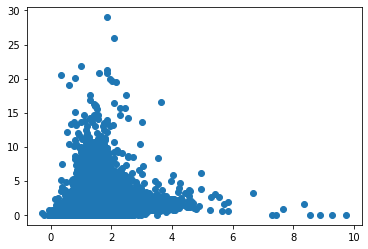

In [92]:
plt.scatter(test_df['sig'].values, test_mat['y'].reshape(-1, ))

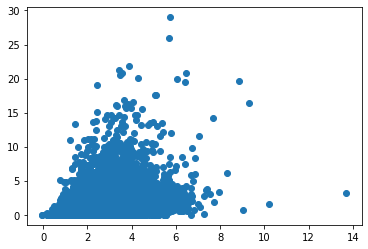

In [153]:
plt.scatter(test_df['sig'].values, test_mat['y'].reshape(-1, )) #downsample

In [122]:
test_mat = scipy.io.loadmat('/data/data_repo/samzhao/transfer_learn_deepsea/starr_sig_A549_499bp_regression_downsample/data/A549_test_rep1_rep2.mat')

In [123]:
np.max(test_mat['y'].reshape(-1, ))

28.99454865618077

In [139]:
np.quantile(test_mat['y'].reshape(-1, ), 0.99)

12.304370042116727

In [130]:
test_mat['x'].shape

(5038, 4, 499)

### rep1

In [97]:
true_label_df = pd.read_csv('../data/test_rep1_valueLabel.bed', sep='\t', header=None)
true_label_df

,0,1,2,3,4
0,chr8,2263,2762,+,0
1,chr8,5765,6264,+,0
2,chr8,7521,8020,+,0
3,chr8,10779,11278,+,0
4,chr8,25502,26001,+,0
...,...,...,...,...,...
95226,chr9,138377328,138377827,+,0
95227,chr9,138381634,138382133,+,0
95228,chr9,138388795,138389294,+,0
95229,chr9,138391106,138391605,+,0


In [98]:
test_df = pd.read_csv('./transfer_trained/test_rep1_valueLabel_predictions.tsv', sep='\t')
test_df

,index,chrom,start,end,strand,contains_unk,0,1,2,3,4,5,6,7,8,9
0,0,chr8,2263,2762,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09
1,1,chr8,5765,6264,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09
2,2,chr8,7521,8020,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09
3,3,chr8,10779,11278,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09
4,4,chr8,25502,26001,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95226,95226,chr9,138377328,138377827,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09
95227,95227,chr9,138381634,138382133,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09
95228,95228,chr9,138388795,138389294,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09
95229,95229,chr9,138391106,138391605,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09


In [99]:
test_df['pred'] = test_df[[str(i) for i in range(0, 10)]].idxmax(axis="columns")

In [100]:
test_df

,index,chrom,start,end,strand,contains_unk,0,1,2,3,4,5,6,7,8,9,pred
0,0,chr8,2263,2762,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0
1,1,chr8,5765,6264,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0
2,2,chr8,7521,8020,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0
3,3,chr8,10779,11278,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0
4,4,chr8,25502,26001,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95226,95226,chr9,138377328,138377827,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0
95227,95227,chr9,138381634,138382133,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0
95228,95228,chr9,138388795,138389294,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0
95229,95229,chr9,138391106,138391605,.,True,1.0,0.000188,0.000029,0.000001,5.790000e-07,5.070000e-08,6.630000e-09,6.370000e-10,1.030000e-09,4.020000e-09,0


In [109]:
ohe = OneHotEncoder(sparse=False)

In [111]:
true_label_ohe = ohe.fit_transform(true_label_df[4].values.reshape(-1, 1))

In [112]:
roc_auc_score(true_label_ohe, test_df[[str(i) for i in range(0, 10)]])

0.6132227812910607

In [30]:
test_df['pred'].value_counts()

1    71349
0    22733
2     1123
9       14
3       12
Name: pred, dtype: int64

In [31]:
true_label_df[4].value_counts()

1    47276
0    36218
2     8842
3     1761
4      536
5      243
9      127
6      116
7       62
8       50
Name: 4, dtype: int64

In [113]:
test_df = pd.read_csv('../../starr_sig_A549_499bp_regression/test_outputs/transfer_trained/test_rep1_valueLabel_predictions.tsv', sep='\t')
test_df

,index,chrom,start,end,strand,contains_unk,sig
0,0,chr8,2263,2762,.,True,0.0788
1,1,chr8,5765,6264,.,True,0.0788
2,2,chr8,7521,8020,.,True,0.0788
3,3,chr8,10779,11278,.,True,0.0788
4,4,chr8,25502,26001,.,True,0.0788
...,...,...,...,...,...,...,...
95226,95226,chr9,138377328,138377827,.,True,0.0788
95227,95227,chr9,138381634,138382133,.,True,0.0788
95228,95228,chr9,138388795,138389294,.,True,0.0788
95229,95229,chr9,138391106,138391605,.,True,0.0788


In [32]:
test_df[['chrom', 'start', 'end', 'strand', 'pred']].to_csv('./transfer_trained/test_rep1_valueLabel_predictions.bed', sep='\t', header=None, index=None)

In [94]:
test_df[['chrom', 'start', 'end', 'strand', 'sig']].to_csv('../../starr_sig_A549_499bp_regression/test_outputs/transfer_trained/test_rep1_valueLabel_predictions_regression.bed', sep='\t', header=None, index=None)